### Task 3.1 Unsupervised Learning - Clustering, 04.04.2025




In [1]:
# Import Bibliothek
import pandas as pd

# CSV-Datei
file_path = "../../data/raw/food.csv"
food_df = pd.read_csv(file_path)

food_df.head()


,Unnamed: 0,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


### Preprocess Z-Transformation

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = food_df.select_dtypes(include=["float64", "int64"]).columns
food_numeric = food_df[numeric_cols]

# Apply z-transformation
scaler = StandardScaler()
food_scaled = scaler.fit_transform(food_numeric)

# Convert scaled data to DataFrame
import numpy as np
food_scaled_df = pd.DataFrame(food_scaled, columns=numeric_cols)

# Preview the data
food_scaled_df.head()


,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
1,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
2,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
3,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
4,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


### Apply KMeans clustering

In [3]:
# Apply KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Test values of k
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(food_scaled_df)
    
    score = silhouette_score(food_scaled_df, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Find best k
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"\n Best k based on Silhouette Score: {best_k}")


Silhouette Score for k=2: 0.3271
Silhouette Score for k=3: 0.3352
Silhouette Score for k=4: 0.2799
Silhouette Score for k=5: 0.2140

 Best k based on Silhouette Score: 3


### Visualize final KMeans clustering using PCA

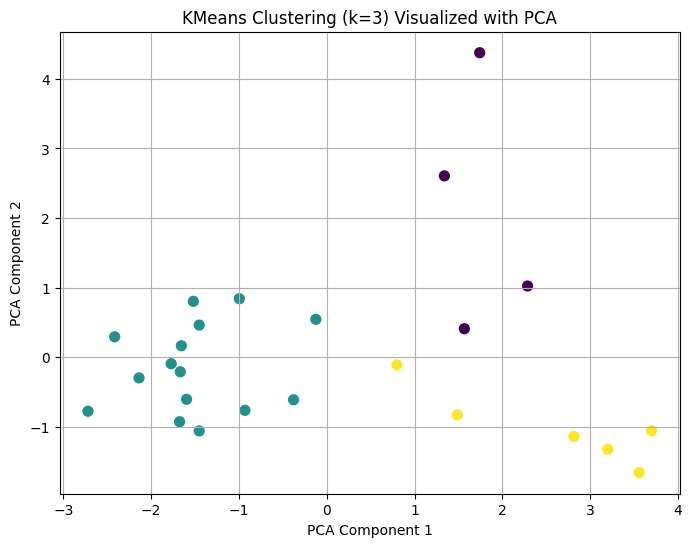

In [4]:
# Import PCA and matplotlib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data
pca = PCA(n_components=2)
food_pca = pca.fit_transform(food_scaled_df)

# Fit KMeans, using the best_k
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
final_labels = final_kmeans.fit_predict(food_scaled_df)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(food_pca[:, 0], food_pca[:, 1], c=final_labels, cmap='viridis', s=50)
plt.title(f'KMeans Clustering (k={best_k}) Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


### Perform hierarchical clustering

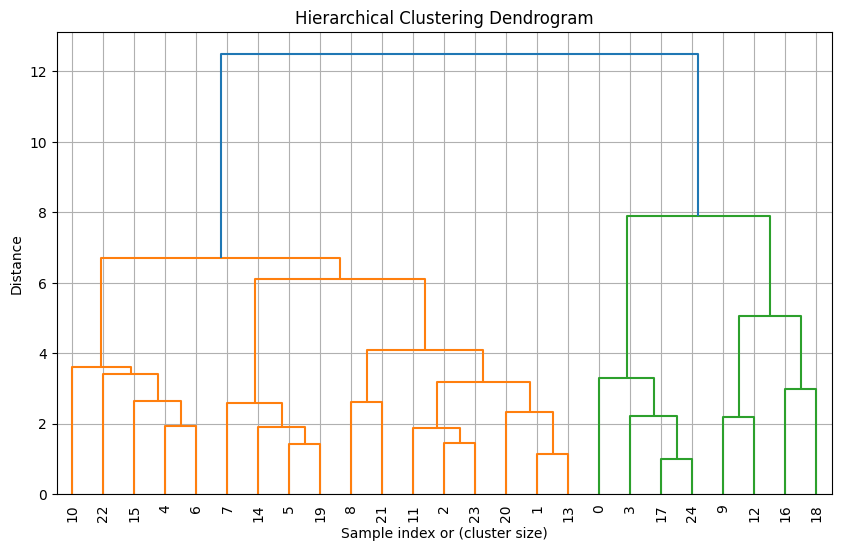

In [ ]:
# Apply function 
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# linkage matrix
linked = linkage(food_scaled_df, method='ward')

# Plot 
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


### Create a heatmap

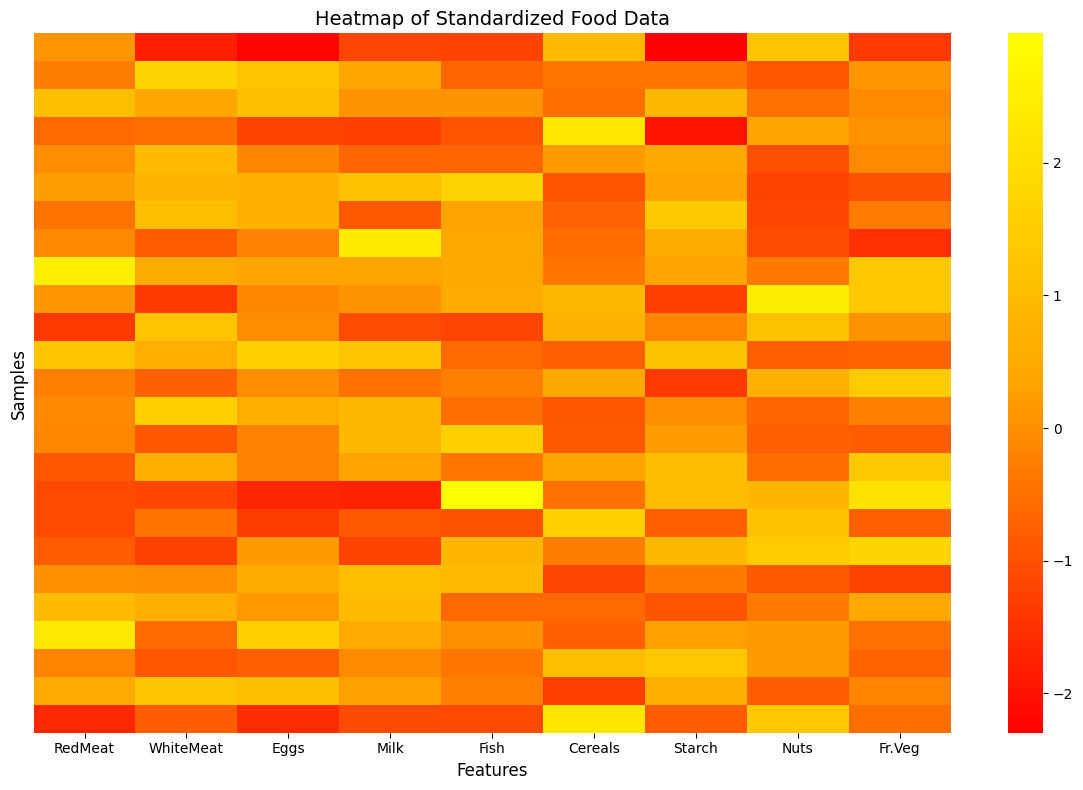

In [ ]:
# Apply seaborn, matplotlib and colormap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define red, orange, yellow color
red_orange_yellow = LinearSegmentedColormap.from_list(
    "red_orange_yellow", ["#ff0000", "#ffa500", "#ffff00"]
)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    food_scaled_df,
    cmap=red_orange_yellow,
    xticklabels=food_scaled_df.columns,  
    yticklabels=False,                  
    cbar=True
)

# Add titles and labels
plt.title("Heatmap of Standardized Food Data", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Samples", fontsize=12)
plt.tight_layout()
plt.show()





### Perform density-based clustering

In [ ]:
# Apply DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Set DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(food_scaled_df)

# Count unique labels (-1 means noise)
unique_labels = set(db_labels)
print(f"Cluster labels found by DBSCAN: {unique_labels}")

# Silhouette score (excluding noise points)
if len(set(db_labels)) > 1 and -1 in db_labels:
    score = silhouette_score(food_scaled_df[db_labels != -1], db_labels[db_labels != -1])
    print(f"Silhouette Score (excluding noise): {score:.4f}")
elif len(set(db_labels)) > 1:
    score = silhouette_score(food_scaled_df, db_labels)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Silhouette Score cannot be computed (only one cluster found).")


Cluster labels found by DBSCAN: {np.int64(-1)}
Silhouette Score cannot be computed (only one cluster found).
